In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def SSD(y, y_pred):
    return np.sum(np.square(y - y_pred), axis=1)  # axis 1 is the signal dimension


def MAD(y, y_pred):
    return np.max(np.abs(y - y_pred), axis=1) # axis 1 is the signal dimension


def PRD(y, y_pred):
    N = np.sum(np.square(y_pred - y), axis=1)
    D = np.sum(np.square(y_pred - np.mean(y)), axis=1)

    PRD = np.sqrt(N/D) * 100

    return PRD


def COS_SIM(y, y_pred):
    cos_sim = []

    y = np.squeeze(y, axis=-1)
    y_pred = np.squeeze(y_pred, axis=-1)

    for idx in range(len(y)):
        kl_temp = cosine_similarity(y[idx].reshape(1, -1), y_pred[idx].reshape(1, -1))
        cos_sim.append(kl_temp)

    cos_sim = np.array(cos_sim)
    return cos_sim

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from prettytable import PrettyTable

def generate_violinplots(np_data, description, ylabel, log):
    # Process the results and store in Panda objects

    col = description
    loss_val_np = np.rot90(np_data)
    pd_df = pd.DataFrame.from_records(loss_val_np, columns=col)

    # Set up the matplotlib figure

    f, ax = plt.subplots()

    sns.set(style="whitegrid")

    ax = sns.violinplot(data=pd_df, palette="Set3", bw=.2, cut=1, linewidth=1)

    if log:
        ax.set_yscale("log")

    ax.set(xlabel='Models/Methods', ylabel=ylabel)
    ax = sns.despine(left=True, bottom=True)

    plt.show()

    #plt.savefig(store_folder + 'violinplot_fco' + info + description + '.png')


def generate_barplot(np_data, description, ylabel, log):
    # Process the results and store in Panda objects
    col = description
    loss_val_np = np.rot90(np_data)
    pd_df = pd.DataFrame.from_records(loss_val_np, columns=col)

    # Set up the matplotlib figure

    f, ax = plt.subplots()

    sns.set(style="whitegrid")

    ax = sns.barplot(data=pd_df)

    if log:
        ax.set_yscale("log")

    ax.set(xlabel='Models/Methods', ylabel=ylabel)
    ax = sns.despine(left=True, bottom=True)

    plt.show()

    #plt.savefig(store_folder + 'violinplot_fco' + info + description + '.png')


def generate_boxplot(np_data, description, ylabel, log):
    # Process the results and store in Panda objects
    col = description
    loss_val_np = np.rot90(np_data)
    pd_df = pd.DataFrame.from_records(loss_val_np, columns=col)

    # Set up the matplotlib figure

    f, ax = plt.subplots()

    sns.set(style="whitegrid")

    ax = sns.boxplot(data=pd_df)

    if log:
        ax.set_yscale("log")

    ax.set(xlabel='Models/Methods', ylabel=ylabel)
    ax = sns.despine(left=True, bottom=True)

    plt.show()

    #plt.savefig(store_folder + 'violinplot_fco' + info + description + '.png')


def generate_hboxplot(np_data, description, ylabel, log, set_x_axis_size=None):
    # Process the results and store in Panda objects
    col = description
    loss_val_np = np.rot90(np_data)

    pd_df = pd.DataFrame.from_records(loss_val_np, columns=col)

    # Set up the matplotlib figure
    sns.set(style="whitegrid")

    f, ax = plt.subplots(figsize=(15, 6))

    ax = sns.boxplot(data=pd_df, orient="h", width=0.4)

    if log:
        ax.set_xscale("log")

    if set_x_axis_size != None:
        ax.set_xlim(set_x_axis_size)

    ax.set(ylabel='Models/Methods', xlabel=ylabel)
    ax = sns.despine(left=True, bottom=True)

    plt.show()

    #plt.savefig(store_folder + 'violinplot_fco' + info + description + '.png')


def ecg_view(ecg, ecg_blw, ecg_dl, ecg_f, signal_name=None, beat_no=None):

    fig, ax = plt.subplots(figsize=(16, 9))
    plt.plot(ecg_blw, 'k', label='ECG + BW')
    plt.plot(ecg, 'g', label='ECG orig')
    plt.plot(ecg_dl, 'b', label='ECG DL Filtered')
    plt.plot(ecg_f, 'r', label='ECG IIR Filtered')
    plt.grid(True)

    plt.ylabel('au')
    plt.xlabel('samples')

    leg = ax.legend()

    if signal_name != None and beat_no != None:
        plt.title('Signal ' + str(signal_name) + 'beat ' + str(beat_no))
    else:
        plt.title('ECG signal for comparison')

    plt.show()


def ecg_view_diff(ecg, ecg_blw, ecg_dl, ecg_f, signal_name=None, beat_no=None):

    fig, ax = plt.subplots(figsize=(16, 9))
    plt.plot(ecg, 'g', label='ECG orig')
    plt.plot(ecg_dl, 'b', label='ECG DL Filtered')
    plt.plot(ecg_f, 'r', label='ECG IIR Filtered')
    plt.plot(ecg - ecg_dl, color='#0099ff', lw=3, label='Difference ECG - DL Filter')
    plt.plot(ecg - ecg_f, color='#cb828d', lw=3, label='Difference ECG - IIR Filter')
    plt.grid(True)

    plt.ylabel('Amplitude (au)')
    plt.xlabel('samples')

    leg = ax.legend()

    if signal_name != None and beat_no != None:
        plt.title('Signal ' + str(signal_name) + 'beat ' + str(beat_no))
    else:
        plt.title('ECG signal for comparison')

    plt.show()


def generate_table(metrics, metric_values, Exp_names):
    # Print tabular results in the console, in a pretty way
    tb = PrettyTable()
    ind = 0

    for exp_name in Exp_names:

        tb.field_names = ['Method/Model'] + metrics

        tb_row = []
        tb_row.append(exp_name)

        for metric in metric_values:   # metric_values[metric][model][beat]
            m_mean = np.mean(metric[ind])
            m_std = np.std(metric[ind])
            tb_row.append('{:.4f}'.format(m_mean) + ' (' + '{:.4f}'.format(m_std / np.sqrt(len(metric[ind]))) + ')')

        tb.add_row(tb_row)
        ind += 1

    print(tb)


def generate_table_time(column_names, all_values, Exp_names, gpu=True):
    # Print tabular results in the console, in a pretty way

    # The FIR and IIR are the last on all_values
    # We need circular shift them to the right
    all_values[0] = all_values[0][-2::] + all_values[0][0:-2]
    all_values[1] = all_values[1][-2::] + all_values[1][0:-2]

    tb = PrettyTable()
    ind = 0

    if gpu:
        device = 'GPU'
    else:
        device = 'CPU'

    for exp_name in Exp_names:
        tb.field_names = ['Method/Model'] + [column_names[0] + '(' + device + ') h:m:s:ms'] + [
            column_names[1] + '(' + device + ') h:m:s:ms']

        tb_row = []
        tb_row.append(exp_name)
        tb_row.append(all_values[0][ind])
        tb_row.append(all_values[1][ind])

        tb.add_row(tb_row)

        ind += 1

    print(tb)

    if gpu:
        print('* For FIR and IIR Filters is CPU since scipy filters are CPU based implementations')

In [3]:
import _pickle as pickle
from datetime import datetime
import numpy as np

dl_experiments = ['DRNN',
                  'FCN-DAE',
                  'Vanilla L',
                  'Vanilla NL',
                  'Multibranch LANL',
                  'Multibranch LANLD'
                  ]

noise_types = ['BW', 'EM', 'MA']
folders = ['BA-DeepFilter_BW_long', 'BA-DeepFilter_EM_long', 'BA-DeepFilter_MA_long']

timing = {}
test_DRNN = {}
test_FCN_DAE = {}
test_Vanilla_L = {}
test_Vanilla_NL = {}
test_Multibranch_LANL = {}
test_Multibranch_LANLD = {}
test_FIR = {}
test_IIR = {}

for noise in range(len(noise_types)):
    # Load timing
    with open(folders[noise]+'/timing_nv1.pkl', 'rb') as input:
        timing_nv1 = pickle.load(input)
        [train_time_list_nv1, test_time_list_nv1] = timing_nv1

    with open(folders[noise]+'/timing_nv2.pkl', 'rb') as input:
        timing_nv2 = pickle.load(input)
        [train_time_list_nv2, test_time_list_nv2] = timing_nv2

    train_time_list = []
    test_time_list = []

    for i in range(len(train_time_list_nv1)):
        train_time_list.append(train_time_list_nv1[i] + train_time_list_nv2[i])

    for i in range(len(test_time_list_nv1)):
        test_time_list.append(test_time_list_nv1[i] + test_time_list_nv2[i])

    timing[noise_types[noise]] = [train_time_list, test_time_list]

    # Load Results DRNN
    with open(folders[noise]+'/test_results_' + dl_experiments[0] + '_nv1.pkl', 'rb') as input:
        test_DRNN_nv1 = pickle.load(input)
    with open(folders[noise]+'/test_results_' + dl_experiments[0] + '_nv2.pkl', 'rb') as input:
        test_DRNN_nv2 = pickle.load(input)

    test_DRNN[noise_types[noise]] = [np.concatenate((test_DRNN_nv1[0], test_DRNN_nv2[0])),
                                     np.concatenate((test_DRNN_nv1[1], test_DRNN_nv2[1])),
                                     np.concatenate((test_DRNN_nv1[2], test_DRNN_nv2[2]))]

    # Load Results FCN_DAE
    with open(folders[noise]+'/test_results_' + dl_experiments[1] + '_nv1.pkl', 'rb') as input:
        test_FCN_DAE_nv1 = pickle.load(input)
    with open(folders[noise]+'/test_results_' + dl_experiments[1] + '_nv2.pkl', 'rb') as input:
        test_FCN_DAE_nv2 = pickle.load(input)

    test_FCN_DAE[noise_types[noise]] = [np.concatenate((test_FCN_DAE_nv1[0], test_FCN_DAE_nv2[0])),
                                        np.concatenate((test_FCN_DAE_nv1[1], test_FCN_DAE_nv2[1])),
                                        np.concatenate((test_FCN_DAE_nv1[2], test_FCN_DAE_nv2[2]))]

    # Load Results Vanilla L
    with open(folders[noise]+'/test_results_' + dl_experiments[2] + '_nv1.pkl', 'rb') as input:
        test_Vanilla_L_nv1 = pickle.load(input)
    with open(folders[noise]+'/test_results_' + dl_experiments[2] + '_nv2.pkl', 'rb') as input:
        test_Vanilla_L_nv2 = pickle.load(input)

    test_Vanilla_L[noise_types[noise]] = [np.concatenate((test_Vanilla_L_nv1[0], test_Vanilla_L_nv2[0])),
                                          np.concatenate((test_Vanilla_L_nv1[1], test_Vanilla_L_nv2[1])),
                                          np.concatenate((test_Vanilla_L_nv1[2], test_Vanilla_L_nv2[2]))]

    # Load Results Exp Vanilla NL
    with open(folders[noise]+'/test_results_' + dl_experiments[3] + '_nv1.pkl', 'rb') as input:
        test_Vanilla_NL_nv1 = pickle.load(input)
    with open(folders[noise]+'/test_results_' + dl_experiments[3] + '_nv2.pkl', 'rb') as input:
        test_Vanilla_NL_nv2 = pickle.load(input)

    test_Vanilla_NL[noise_types[noise]] = [np.concatenate((test_Vanilla_NL_nv1[0], test_Vanilla_NL_nv2[0])),
                                           np.concatenate((test_Vanilla_NL_nv1[1], test_Vanilla_NL_nv2[1])),
                                           np.concatenate((test_Vanilla_NL_nv1[2], test_Vanilla_NL_nv2[2]))]

    # Load Results Multibranch LANL
    with open(folders[noise]+'/test_results_' + dl_experiments[4] + '_nv1.pkl', 'rb') as input:
        test_Multibranch_LANL_nv1 = pickle.load(input)
    with open(folders[noise]+'/test_results_' + dl_experiments[4] + '_nv2.pkl', 'rb') as input:
        test_Multibranch_LANL_nv2 = pickle.load(input)

    test_Multibranch_LANL[noise_types[noise]] = [np.concatenate((test_Multibranch_LANL_nv1[0], test_Multibranch_LANL_nv2[0])),
                                                 np.concatenate((test_Multibranch_LANL_nv1[1], test_Multibranch_LANL_nv2[1])),
                                                 np.concatenate((test_Multibranch_LANL_nv1[2], test_Multibranch_LANL_nv2[2]))]

    # Load Results Multibranch LANLD
    with open(folders[noise]+'/test_results_' + dl_experiments[5] + '_nv1.pkl', 'rb') as input:
        test_Multibranch_LANLD_nv1 = pickle.load(input)
    with open(folders[noise]+'/test_results_' + dl_experiments[5] + '_nv2.pkl', 'rb') as input:
        test_Multibranch_LANLD_nv2 = pickle.load(input)

    test_Multibranch_LANLD[noise_types[noise]] = [np.concatenate((test_Multibranch_LANLD_nv1[0], test_Multibranch_LANLD_nv2[0])),
                                                  np.concatenate((test_Multibranch_LANLD_nv1[1], test_Multibranch_LANLD_nv2[1])),
                                                  np.concatenate((test_Multibranch_LANLD_nv1[2], test_Multibranch_LANLD_nv2[2]))]

    # Load Result FIR Filter
    with open(folders[noise]+'/test_results_FIR_nv1.pkl', 'rb') as input:
        test_FIR_nv1 = pickle.load(input)
    with open(folders[noise]+'/test_results_FIR_nv2.pkl', 'rb') as input:
        test_FIR_nv2 = pickle.load(input)

    test_FIR[noise_types[noise]] = [np.concatenate((test_FIR_nv1[0], test_FIR_nv2[0])),
                                    np.concatenate((test_FIR_nv1[1], test_FIR_nv2[1])),
                                    np.concatenate((test_FIR_nv1[2], test_FIR_nv2[2]))]

    # Load Result IIR Filter
    with open(folders[noise]+'/test_results_IIR_nv1.pkl', 'rb') as input:
        test_IIR_nv1 = pickle.load(input)
    with open(folders[noise]+'/test_results_IIR_nv2.pkl', 'rb') as input:
        test_IIR_nv2 = pickle.load(input)

    test_IIR[noise_types[noise]] = [np.concatenate((test_IIR_nv1[0], test_IIR_nv2[0])),
                                    np.concatenate((test_IIR_nv1[1], test_IIR_nv2[1])),
                                    np.concatenate((test_IIR_nv1[2], test_IIR_nv2[2]))]

In [4]:
SSD_values_DL_DRNN = {}
MAD_values_DL_DRNN = {}
PRD_values_DL_DRNN = {}
COS_SIM_values_DL_DRNN = {}

SSD_values_DL_FCN_DAE = {}
MAD_values_DL_FCN_DAE = {}
PRD_values_DL_FCN_DAE = {}
COS_SIM_values_DL_FCN_DAE = {}

SSD_values_DL_exp_1 = {}
MAD_values_DL_exp_1 = {}
PRD_values_DL_exp_1 = {}
COS_SIM_values_DL_exp_1 = {}

SSD_values_DL_exp_2 = {}
MAD_values_DL_exp_2 = {}
PRD_values_DL_exp_2 = {}
COS_SIM_values_DL_exp_2 = {}

SSD_values_DL_exp_3 = {}
MAD_values_DL_exp_3 = {}
PRD_values_DL_exp_3 = {}
COS_SIM_values_DL_exp_3 = {}

SSD_values_DL_exp_4 = {}
MAD_values_DL_exp_4 = {}
PRD_values_DL_exp_4 = {}
COS_SIM_values_DL_exp_4 = {}

SSD_values_FIR = {}
MAD_values_FIR = {}
PRD_values_FIR = {}
COS_SIM_values_FIR = {}

SSD_values_IIR = {}
MAD_values_IIR = {}
PRD_values_IIR = {}
COS_SIM_values_IIR = {}

for noise in noise_types:
    # DL Metrics

    # Exp FCN-DAE

    [X_test, y_test, y_pred] = test_DRNN[noise]

    SSD_values_DL_DRNN[noise] = SSD(y_test, y_pred)

    MAD_values_DL_DRNN[noise] = MAD(y_test, y_pred)

    PRD_values_DL_DRNN[noise] = PRD(y_test, y_pred)

    COS_SIM_values_DL_DRNN[noise] = COS_SIM(y_test, y_pred)


    # Exp FCN-DAE

    [X_test, y_test, y_pred] = test_FCN_DAE[noise]

    SSD_values_DL_FCN_DAE[noise] = SSD(y_test, y_pred)

    MAD_values_DL_FCN_DAE[noise] = MAD(y_test, y_pred)

    PRD_values_DL_FCN_DAE[noise] = PRD(y_test, y_pred)

    COS_SIM_values_DL_FCN_DAE[noise] = COS_SIM(y_test, y_pred)


    # Vanilla L

    [X_test, y_test, y_pred] = test_Vanilla_L[noise]

    SSD_values_DL_exp_1[noise] = SSD(y_test, y_pred)

    MAD_values_DL_exp_1[noise] = MAD(y_test, y_pred)

    PRD_values_DL_exp_1[noise] = PRD(y_test, y_pred)

    COS_SIM_values_DL_exp_1[noise] = COS_SIM(y_test, y_pred)


    # Vanilla_NL

    [X_test, y_test, y_pred] = test_Vanilla_NL[noise]

    SSD_values_DL_exp_2[noise] = SSD(y_test, y_pred)

    MAD_values_DL_exp_2[noise] = MAD(y_test, y_pred)

    PRD_values_DL_exp_2[noise] = PRD(y_test, y_pred)

    COS_SIM_values_DL_exp_2[noise] = COS_SIM(y_test, y_pred)


    # Multibranch_LANL

    [X_test, y_test, y_pred] = test_Multibranch_LANL[noise]

    SSD_values_DL_exp_3[noise] = SSD(y_test, y_pred)

    MAD_values_DL_exp_3[noise] = MAD(y_test, y_pred)

    PRD_values_DL_exp_3[noise] = PRD(y_test, y_pred)

    COS_SIM_values_DL_exp_3[noise] = COS_SIM(y_test, y_pred)


    # Multibranch_LANLD

    [X_test, y_test, y_pred] = test_Multibranch_LANLD[noise]

    SSD_values_DL_exp_4[noise] = SSD(y_test, y_pred)

    MAD_values_DL_exp_4[noise] = MAD(y_test, y_pred)

    PRD_values_DL_exp_4[noise] = PRD(y_test, y_pred)

    COS_SIM_values_DL_exp_4[noise] = COS_SIM(y_test, y_pred)


    # Digital Filtering

    # FIR Filtering Metrics
    [X_test, y_test, y_filter] = test_FIR[noise]

    SSD_values_FIR[noise] = SSD(y_test, y_filter)

    MAD_values_FIR[noise] = MAD(y_test, y_filter)

    PRD_values_FIR[noise] = PRD(y_test, y_filter)

    COS_SIM_values_FIR[noise] = COS_SIM(y_test, y_filter)


    # IIR Filtering Metrics (Best)
    [X_test, y_test, y_filter] = test_IIR[noise]

    SSD_values_IIR[noise] = SSD(y_test, y_filter)

    MAD_values_IIR[noise] = MAD(y_test, y_filter)

    PRD_values_IIR[noise] = PRD(y_test, y_filter)

    COS_SIM_values_IIR[noise] = COS_SIM(y_test, y_filter)

In [5]:
len(COS_SIM_values_IIR['BW'])

1092

In [6]:
SSD_all = {}
MAD_all = {}
PRD_all = {}
COS_SIM_all = {}

for noise in noise_types:   
    SSD_all[noise] = [SSD_values_FIR[noise],
                   SSD_values_IIR[noise],
                   SSD_values_DL_DRNN[noise],
                   SSD_values_DL_FCN_DAE[noise],
                   #SSD_values_DL_exp_1[noise],
                   #SSD_values_DL_exp_2[noise],
                   #SSD_values_DL_exp_3[noise],
                   SSD_values_DL_exp_4[noise],
                   ]

    MAD_all[noise] = [MAD_values_FIR[noise],
                   MAD_values_IIR[noise],
                   MAD_values_DL_DRNN[noise],
                   MAD_values_DL_FCN_DAE[noise],
                   #MAD_values_DL_exp_1[noise],
                   #MAD_values_DL_exp_2[noise],
                   #MAD_values_DL_exp_3[noise],
                   MAD_values_DL_exp_4[noise],
                   ]

    PRD_all[noise] = [PRD_values_FIR[noise],
                   PRD_values_IIR[noise],
                   PRD_values_DL_DRNN[noise],
                   PRD_values_DL_FCN_DAE[noise],
                   #PRD_values_DL_exp_1[noise],
                   #PRD_values_DL_exp_2[noise],
                   #PRD_values_DL_exp_3[noise],
                   PRD_values_DL_exp_4[noise],
                   ]

    COS_SIM_all[noise] = [COS_SIM_values_FIR[noise],
                       COS_SIM_values_IIR[noise],
                       COS_SIM_values_DL_DRNN[noise],
                       COS_SIM_values_DL_FCN_DAE[noise],
                       #COS_SIM_values_DL_exp_1[noise],
                       #COS_SIM_values_DL_exp_2[noise],
                       #COS_SIM_values_DL_exp_3[noise],
                       COS_SIM_values_DL_exp_4[noise],
                       ]


    Exp_names = ['FIR Filter', 'IIR Filter'] + ['DRNN', 'FCN-DAE', 'DeepFilter']

    metrics = ['SSD','COS_SIM']
    metric_values = [SSD_all[noise], COS_SIM_all[noise]]

    print(noise+':')
    
    # Metrics table
    generate_table(metrics, metric_values, Exp_names)

    # Timing table
    timing_var = ['training', 'test']
    generate_table_time(timing_var, timing[noise], Exp_names, gpu=True)

BW:
+--------------+-----------------------+-----------------+
| Method/Model |          SSD          |     COS_SIM     |
+--------------+-----------------------+-----------------+
|  FIR Filter  |  4359.2734 (362.5479) | 0.7163 (0.0091) |
|  IIR Filter  |  4359.5863 (363.3868) | 0.7147 (0.0092) |
|     DRNN     | 10638.3996 (629.4971) | 0.4785 (0.0078) |
|   FCN-DAE    |  4621.7491 (193.9132) | 0.3192 (0.0087) |
|  DeepFilter  | 11115.0560 (688.8836) | 0.3348 (0.0085) |
+--------------+-----------------------+-----------------+
+--------------+------------------------+--------------------+
| Method/Model | training(GPU) h:m:s:ms | test(GPU) h:m:s:ms |
+--------------+------------------------+--------------------+
|  FIR Filter  |           0            |   0:02:32.350602   |
|  IIR Filter  |           0            |   0:00:01.569065   |
|     DRNN     |     1:27:59.878705     |   0:01:34.248272   |
|   FCN-DAE    |     0:10:43.916561     |   0:00:04.554110   |
|  DeepFilter  |     0:0

In [7]:
import pandas as pd

result_means = {}
result_stds = {}
result_size = {}

SSD_columns = ['SSD_values_FIR', 'SSD_values_IIR', 'SSD_values_DL_DRNN', 'SSD_values_DL_FCN_DAE', 
               'SSD_values_DL_exp_4']
MAD_columns = ['MAD_values_FIR', 'MAD_values_IIR', 'MAD_values_DL_DRNN', 'MAD_values_DL_FCN_DAE', 
               'MAD_values_DL_exp_4']
PRD_columns = ['PRD_values_FIR', 'PRD_values_IIR', 'PRD_values_DL_DRNN', 'PRD_values_DL_FCN_DAE', 
               'PRD_values_DL_exp_4']
COS_SIM_columns = ['COS_SIM_values_FIR', 'COS_SIM_values_IIR', 'COS_SIM_values_DL_DRNN', 'COS_SIM_values_DL_FCN_DAE', 
                    'COS_SIM_values_DL_exp_4']

for noise in range(len(noise_types)):
    rnd_test = np.load(folders[noise]+'/rnd_test.npy')

    rnd_test = np.concatenate([rnd_test, rnd_test])
    
    df = pd.DataFrame({'rnd': rnd_test})
    for r in range(len(Exp_names)):
        df[SSD_columns[r]] = SSD_all[noise_types[noise]][r]
        df[MAD_columns[r]] = MAD_all[noise_types[noise]][r]
        df[PRD_columns[r]] = PRD_all[noise_types[noise]][r]
        COS_SIM_all[noise_types[noise]][r] = np.reshape(COS_SIM_all[noise_types[noise]][r], np.shape(PRD_all[noise_types[noise]][r]))
        df[COS_SIM_columns[r]] = COS_SIM_all[noise_types[noise]][r]

    result_means[noise_types[noise]] = df.groupby('rnd').mean()
    result_stds[noise_types[noise]] = df.groupby('rnd').std()
    result_size[noise_types[noise]] = df.groupby('rnd').size()

In [8]:
len(rnd_test)

1092

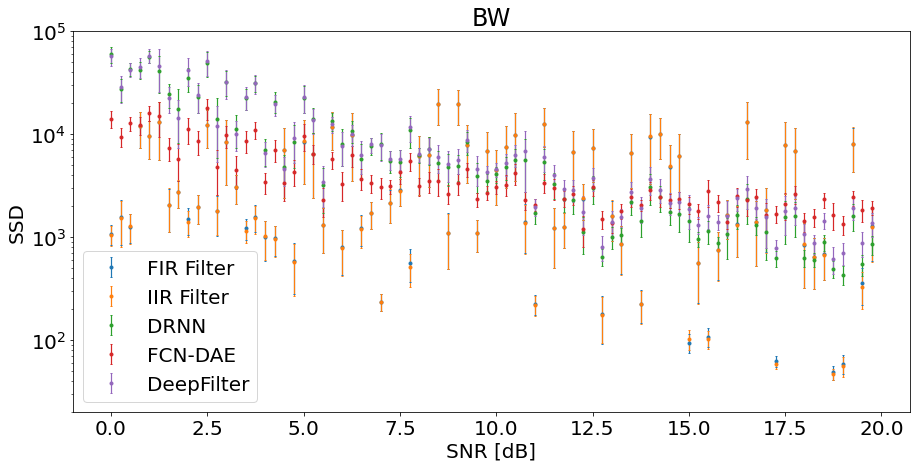

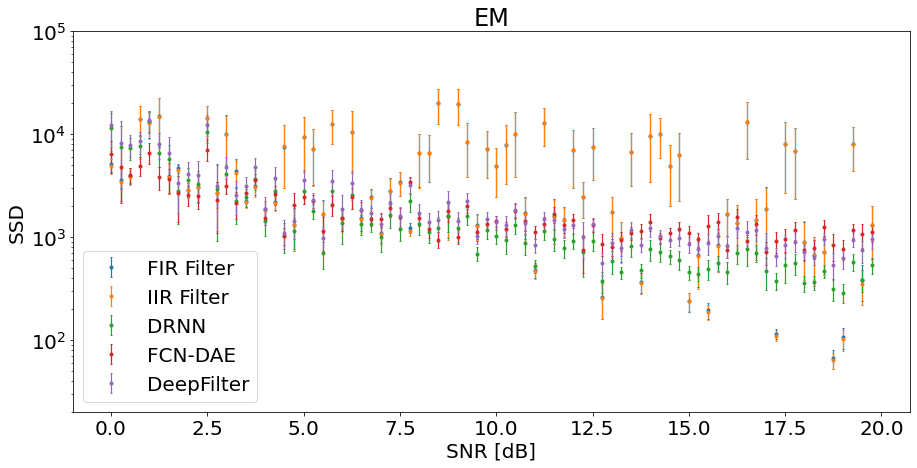

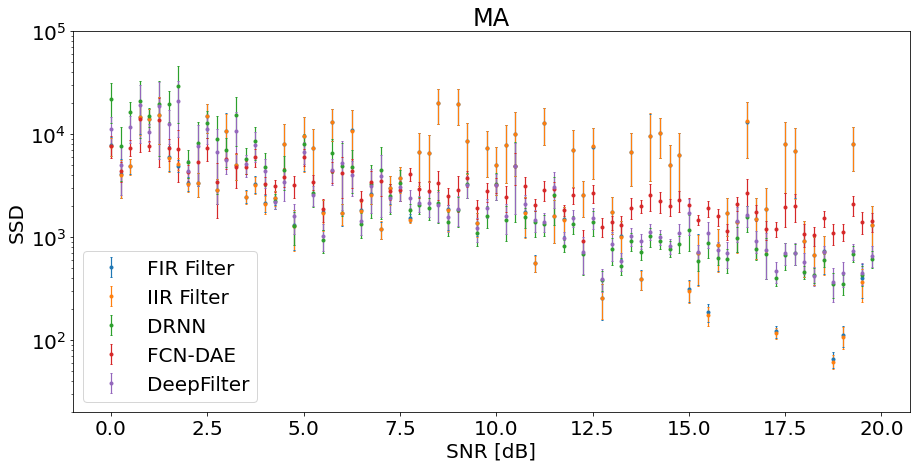

In [9]:
import matplotlib.pyplot as plt


for noise in noise_types:
    fig = plt.figure(figsize=(15, 7))
    plt.rc('font', size=20)
    for name in range(len(SSD_columns)):
        yerr = np.array(result_stds[noise][SSD_columns[name]].tolist()) / np.array(np.sqrt(result_size[noise]).tolist())
        plt.errorbar(result_means[noise].index, result_means[noise][SSD_columns[name]].tolist(), 
                     yerr=yerr, label=Exp_names[name], fmt='.', elinewidth=1.2, capsize=1)
    plt.legend()
    plt.title(noise)
    plt.yscale('log')
    plt.ylabel('SSD')
    plt.xlabel('SNR [dB]')
    plt.ylim(20, 100000)
    plt.savefig('Figures/MultiECG_SSD_{}.png'.format(noise), bbox_inches='tight')

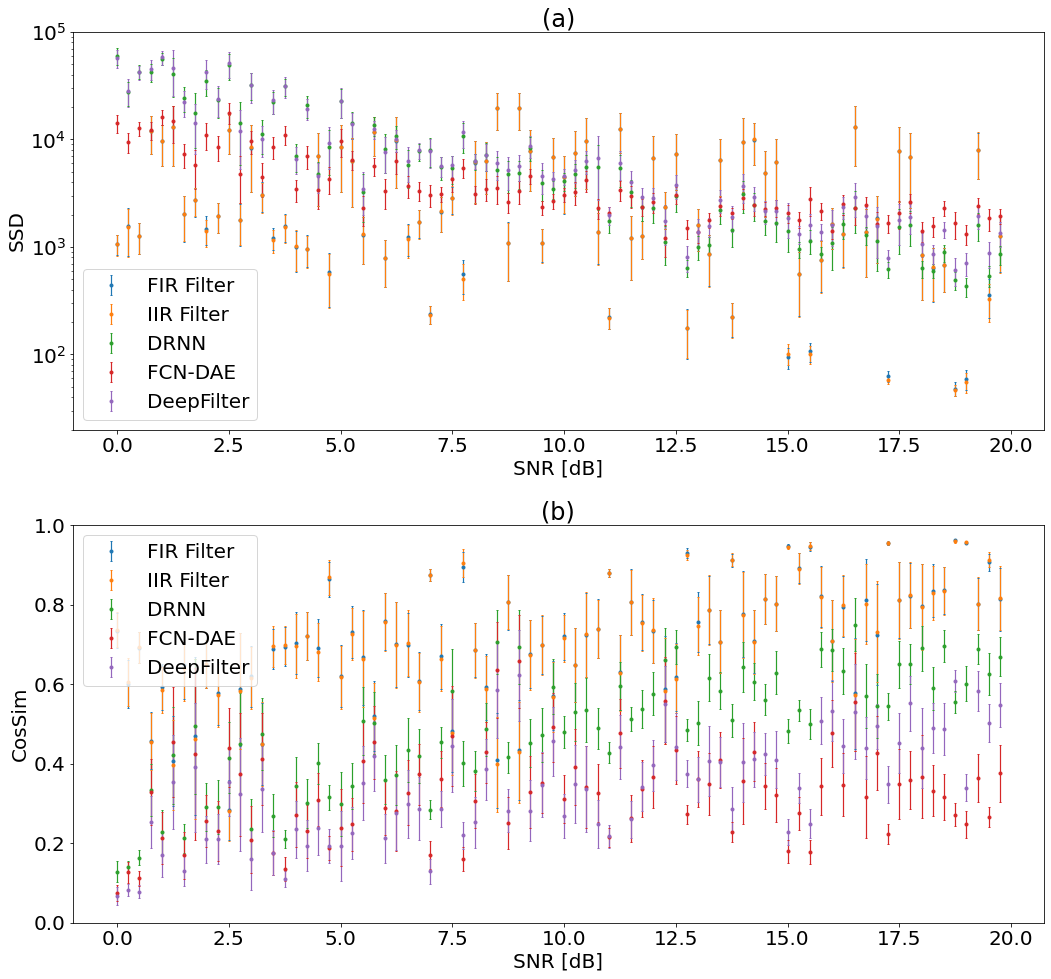

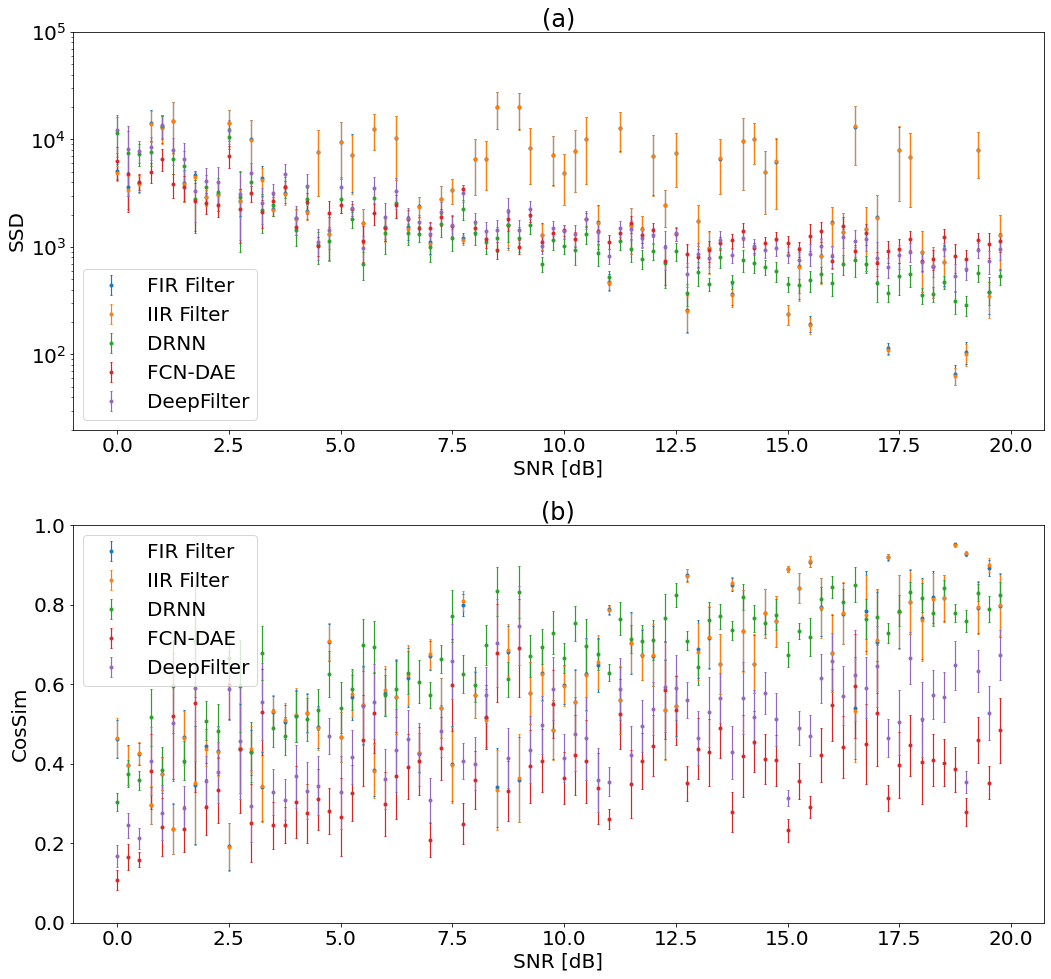

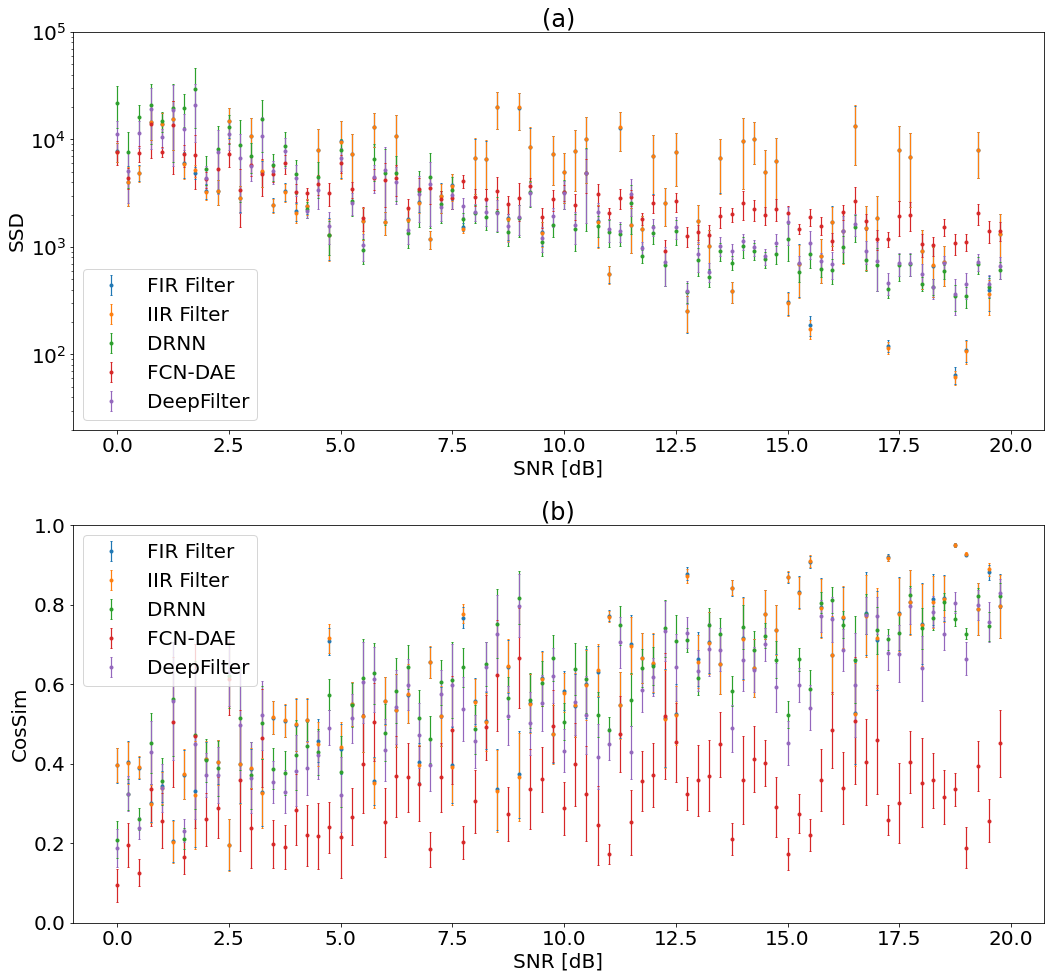

In [10]:
for noise in noise_types:

    yerr_ssd = np.array(result_stds[noise][SSD_columns[name]].tolist()) / np.array(np.sqrt(result_size[noise]).tolist())
    yerr_cos_sim = np.array(result_stds[noise][COS_SIM_columns[name]].tolist()) / np.array(np.sqrt(result_size[noise]).tolist())
    plt.rc('font', size=20)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,14))
    fig.subplots_adjust(hspace=0.7)
    for name in range(len(SSD_columns)):
        yerr_ssd = np.array(result_stds[noise][SSD_columns[name]].tolist()) / np.array(np.sqrt(result_size[noise]).tolist())
        yerr_cos_sim = np.array(result_stds[noise][COS_SIM_columns[name]].tolist()) / np.array(np.sqrt(result_size[noise]).tolist())
        ax1.errorbar(result_means[noise].index, result_means[noise][SSD_columns[name]].tolist(), 
                             yerr=yerr_ssd, label=Exp_names[name], fmt='.', elinewidth=1.2, capsize=1)
        ax1.set_xlabel('SNR [dB]')
        ax1.set_ylabel('SSD')
        ax1.title.set_text('(a)')
        ax1.set_yscale('log')
        ax1.set_ylim(20, 100000)
        ax1.legend()

        ax2.errorbar(result_means[noise].index, result_means[noise][COS_SIM_columns[name]].tolist(), 
                             yerr=yerr_cos_sim, label=Exp_names[name], fmt='.', elinewidth=1.2, capsize=1)
        ax2.set_xlabel('SNR [dB]')
        ax2.set_ylabel('CosSim')
        ax2.title.set_text('(b)')
        ax2.legend()
        ax2.set_ylim(0, 1)
        #ax2.set_yscale('log')
        plt.tight_layout()
        
    plt.savefig('Figures/MultiECG_Metrics_{}.png'.format(noise), bbox_inches='tight')
    plt.show()

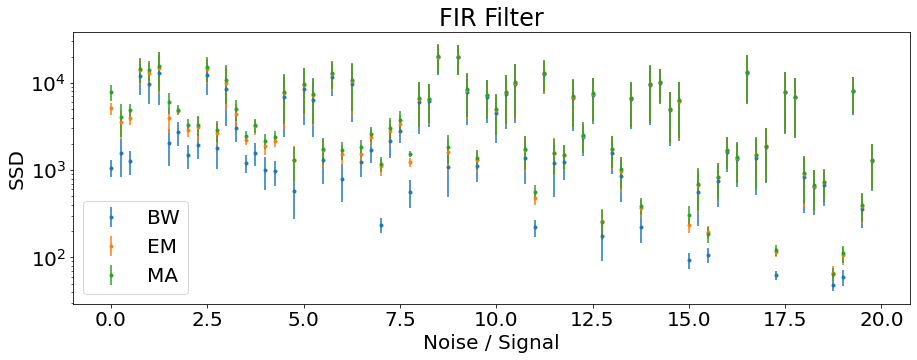

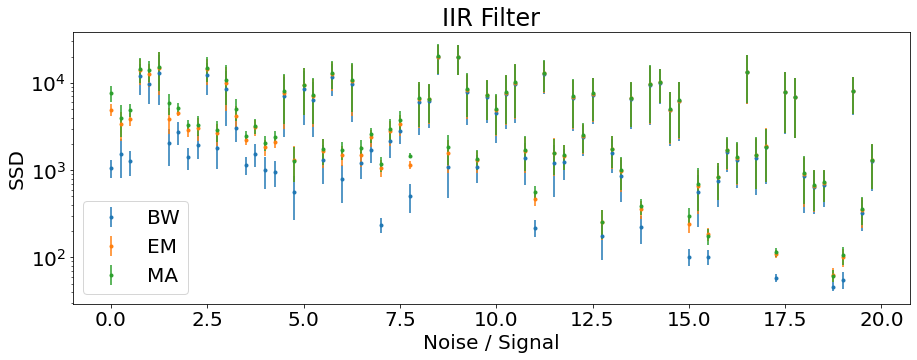

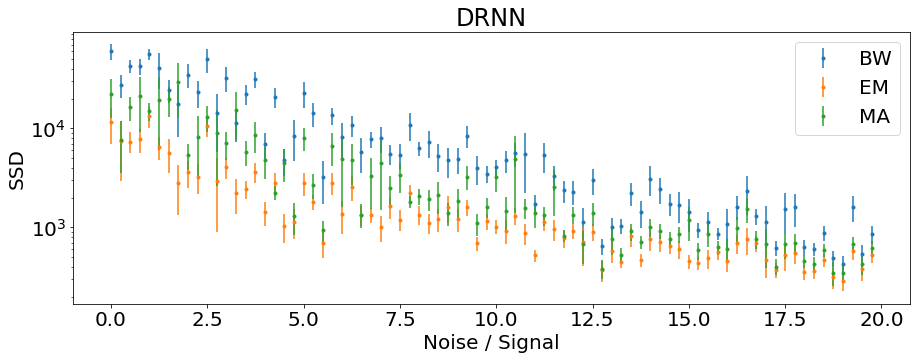

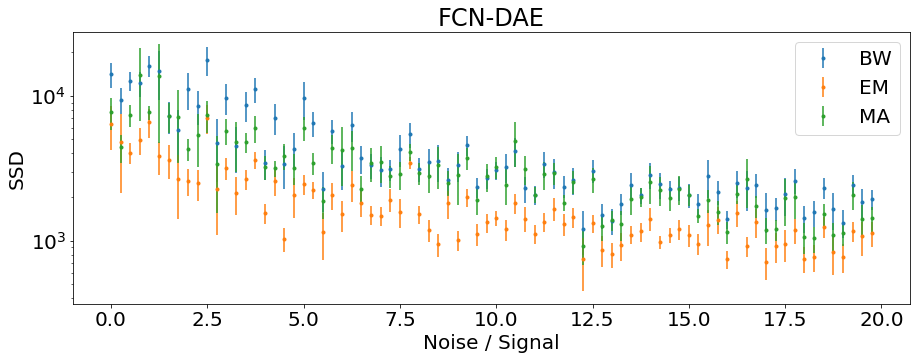

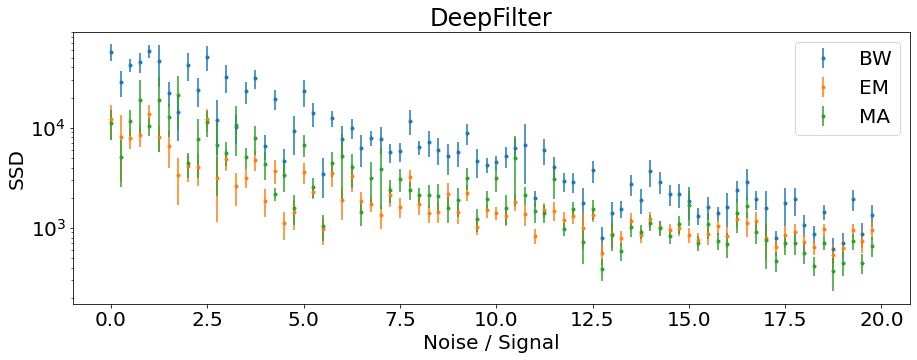

In [11]:
import matplotlib.pyplot as plt

for name in range(len(SSD_columns)):
    fig = plt.figure(figsize=(15, 5))
    for noise in noise_types:
        yerr = np.array(result_stds[noise][SSD_columns[name]].tolist()) / np.array(np.sqrt(result_size[noise]).tolist())
        plt.errorbar(result_means[noise].index, result_means[noise][SSD_columns[name]].tolist(), yerr=yerr, label=noise, fmt='.')
    plt.legend()
    plt.title(Exp_names[name])
    plt.yscale('log')
    plt.ylabel('SSD')
    plt.xlabel('Noise / Signal')
    #plt.ylim(1, 250)

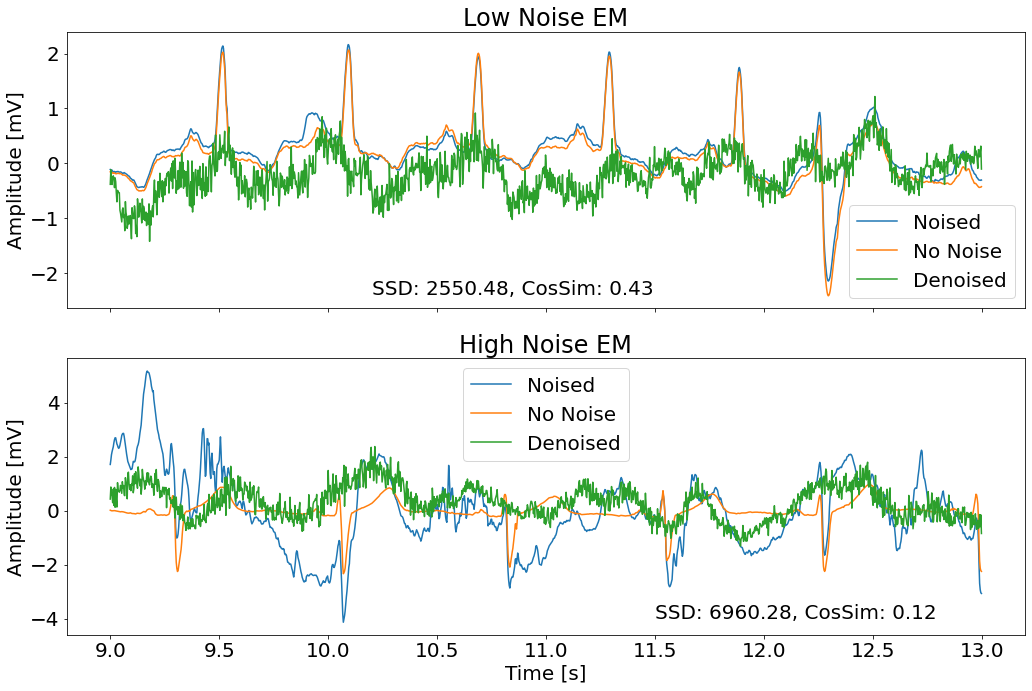

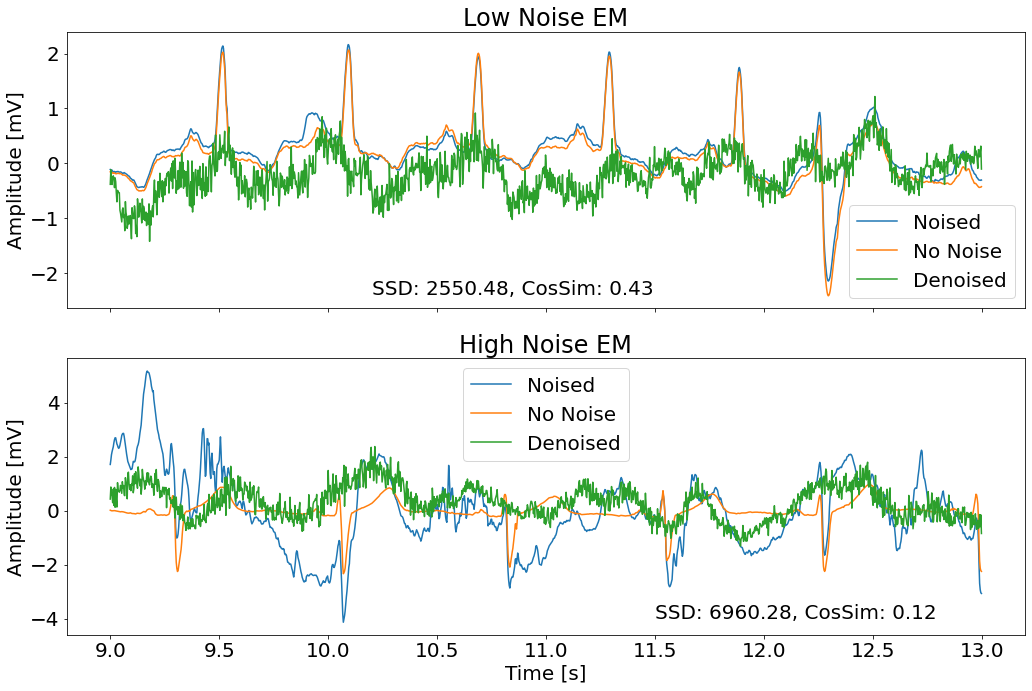

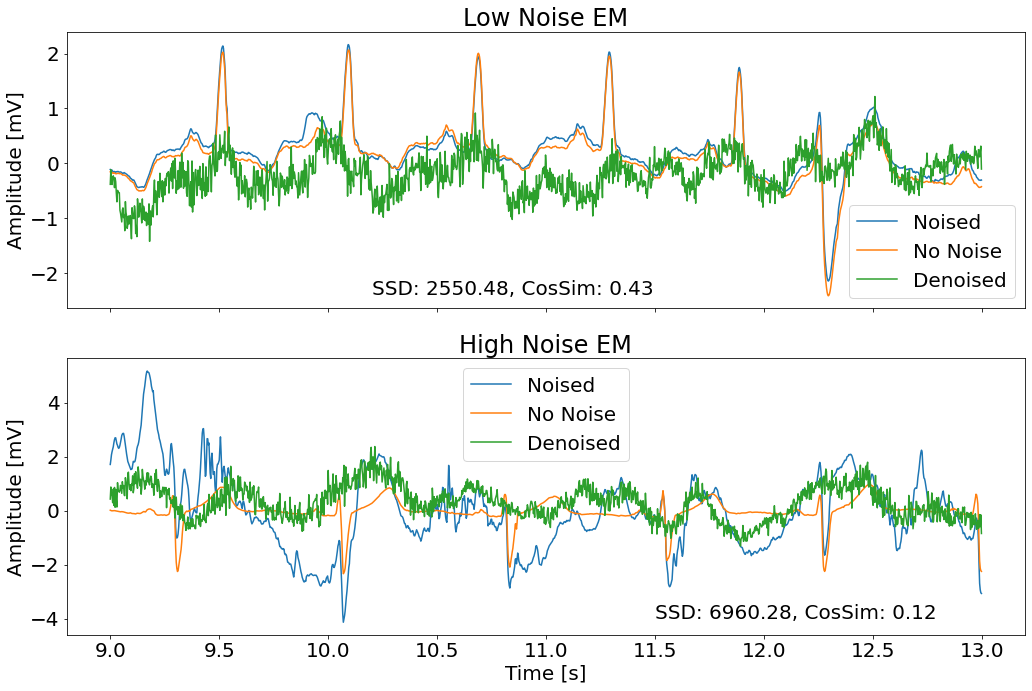

In [67]:
time = np.arange(0, 8192) / 360
N_S = [0, 20]

for noise_i in range(len(noise_types)):
    noise = 1
    rnd_test = np.load(folders[noise]+'/rnd_test.npy')

    rnd_test = np.concatenate([rnd_test, rnd_test])
    low_noise = np.transpose(np.where(rnd_test == 19.75))
    high_noise = np.transpose(np.where(rnd_test == 0))
    medium_noise = np.transpose(np.where(rnd_test == 10))
    low_noise_idx = low_noise[int((len(low_noise))/2)]
    high_noise_idx = high_noise[int((len(high_noise))/2)]
    medium_noise_idx = medium_noise[int((len(medium_noise))/2)]
    [X_test, y_test, y_pred] = test_FCN_DAE[noise_types[noise]]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10), sharex='all')
    fig.subplots_adjust(hspace=0.7)

    ax1.plot(time[9*360:13*360], np.reshape(X_test[low_noise_idx], len(time))[9*360:13*360], label='Noised')
    ax1.plot(time[9*360:13*360], np.reshape(y_test[low_noise_idx], len(time))[9*360:13*360], label='No Noise')
    ax1.plot(time[9*360:13*360], np.reshape(y_pred[low_noise_idx], len(time))[9*360:13*360], label='Denoised')
    #ax1.set_xlim(0, 5)
    ax1.set_ylabel('Amplitude [mV]')
    ax1.legend()
    ax1.text(10.2, -2.4, 'SSD: {:.2f}, CosSim: {:.2f}'.format(float(SSD_all['EM'][3][low_noise_idx]), 
                                                            float(COS_SIM_all['EM'][3][low_noise_idx])))
    ax1.title.set_text('Low Noise ' + noise_types[noise])
    
    ax2.plot(time[9*360:13*360], np.reshape(X_test[high_noise_idx], len(time))[9*360:13*360], label='Noised')
    ax2.plot(time[9*360:13*360], np.reshape(y_test[high_noise_idx], len(time))[9*360:13*360], label='No Noise')
    ax2.plot(time[9*360:13*360], np.reshape(y_pred[high_noise_idx], len(time))[9*360:13*360], label='Denoised')
    #ax1.set_xlim(0, 5)
    ax2.set_xlabel('Time [s]')
    ax2.set_ylabel('Amplitude [mV]')
    ax2.legend()
    ax2.text(11.5, -4, 'SSD: {:.2f}, CosSim: {:.2f}'.format(float(SSD_all['EM'][3][high_noise_idx]), 
                                                            float(COS_SIM_all['EM'][3][high_noise_idx])))
    ax2.title.set_text('High Noise ' + noise_types[noise])
    
    '''ax3.plot(time[3196:4996], np.reshape(X_test[high_noise_idx], len(time))[3196:4996], label='Noised')
    ax3.plot(time[3196:4996], np.reshape(y_test[high_noise_idx], len(time))[3196:4996], label='No Noise')
    ax3.plot(time[3196:4996], np.reshape(y_pred[high_noise_idx], len(time))[3196:4996], label='Denoised')
    #ax1.set_xlim(0, 5)
    ax3.set_xlabel('time')
    ax3.set_ylabel('Amplitude')
    ax3.legend()
    ax3.title.set_text('High Noise ' + noise_types[noise])'''
    plt.tight_layout()
    plt.savefig('Figures/NECG_EM_FCN_DAE_denoised.png', bbox_inches='tight')
    plt.show()

In [59]:
l = []
for i in np.transpose(np.where(rnd_test == 0)):
    l.append(float(COS_SIM_all['EM'][2][int(i)]))
max(l)

0.37714931481731523

In [43]:
print(np.transpose(np.where(rnd_test == 0)))

[[  82]
 [  85]
 [ 155]
 [ 325]
 [ 458]
 [ 628]
 [ 631]
 [ 701]
 [ 871]
 [1004]]
